# Quickstart

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rheopy/rheoflow/blob/master/notebooks/index.ipynb)

In [ ]:
!pip install git+https://github.com/rheopy/rheoflow.git

## Turbulent Flow of Non-Newtonian Fluids - Dodge Metzner Figure 12
D.W. Dodge and A.B. Metzner, Turbulent Flow of Non-Newtonian Systems, AIChE J 5(2), 189-204 (1959).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as spo
from scipy.optimize import fsolve

from rheoflow import friction_factor_property as f

import warnings
warnings.filterwarnings("ignore")

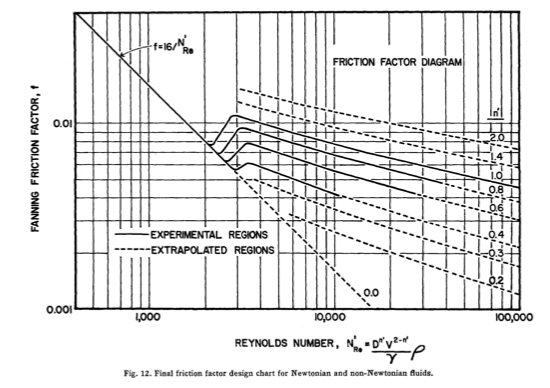

In [5]:
def re_dm(rho,d,v,k,n):
    return d**n * v**(2.-n) * rho / (k*8.0**(n-1.))

def f_dm(re,n):
    f_laminar = 16./(np.abs(re)+1.0e-9)
    if (f_laminar < 0.008):
        f_dodgemetz = lambda x: np.sqrt(1.0/(x+1.e-9)) - 4.0/n**0.75*np.log10(re*(x+1.e-9)**(1.-n/2.)) + 0.4/n**1.2
        f_fanning = spo.brentq( f_dodgemetz, 0., 1.e+4)
    else:
        f_fanning = f_laminar
    return np.abs(f_fanning)

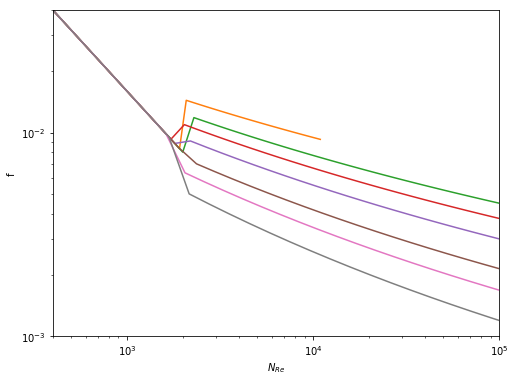

In [13]:
plt.figure(figsize=(8,6))
rho=1000.
k = .1
d = .1
v = np.logspace(-3.,3.,101)
n_list = [2.0,1.4,1.0,.8,.6,.4,.3,.2]
for n in n_list:
    re_list = list(map(lambda x: re_dm(rho,d,x,k,n=n),v))
    f_list = list(map(lambda x: f_dm(x,n),re_list))
    plt.loglog(re_list,f_list,'-')
plt.xlim([400.,100000.])
plt.ylim([.001,.04])
plt.xlabel('$N_{Re}$')
plt.ylabel('f');

## Example Dodge-Metzner friction factor calculation for power-law viscosity model

In [16]:
re = 1.e+5
n=.5

f_dm(re,n)

0.002586428926781602